# Portfolio Risk-Return Analysis
This notebook demonstrates key concepts in portfolio analysis by visualizing the risk-return relationship of different stocks.

## Setup
First, let's import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection
We'll analyze some major stocks plus the market index (SPY). Let's create a function to fetch and process our data:

In [2]:
# Define our stock tickers
tickers = ['AAPL', 'MSFT', 'JNJ', 'JPM', 'SPY']


def get_stock_data(tickers, start_date='2020-01-01', end_date='2023-12-31'):
    """
    Fetches monthly returns for given stock tickers
    """
    data = pd.DataFrame()

    for ticker in tickers:
        # Download stock data
        stock = yf.download(ticker, start=start_date,
                            end=end_date, progress=False)
        # Calculate monthly returns
        monthly_returns = stock['Close'].resample('ME').last().pct_change()
        data[ticker] = monthly_returns

    return data


# Fetch our data
returns_df = get_stock_data(tickers)

/tmp/ipython-input-3873882681.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start_date,
/tmp/ipython-input-3873882681.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = stock['Close'].resample('M').last().pct_change()
/tmp/ipython-input-3873882681.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start_date,
/tmp/ipython-input-3873882681.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = stock['Close'].resample('M').last().pct_change()
/tmp/ipython-input-3873882681.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(ticker, start=start_date,
/tmp/ipython-input-3873882681.py:16: FutureWarning: 'M' is deprecated and will be removed in a future

## Calculate Risk and Return Metrics
Now let's calculate annualized returns and risks for each stock:

In [3]:
def calculate_metrics(returns_df):
    """
    Calculates annualized returns and risks for each stock
    """
    # Calculate annualized metrics
    annual_returns = returns_df.mean() * 12 * 100  # Convert to percentage
    annual_risk = returns_df.std() * np.sqrt(12) * 100  # Convert to percentage

    metrics = pd.DataFrame({
        'Annual Return (%)': annual_returns,
        'Annual Standard Deviation (%)': annual_risk
    })

    return metrics


# Calculate metrics
metrics = calculate_metrics(returns_df)
print("\nRisk-Return Metrics:")
display(metrics)


Risk-Return Metrics:


,Annual Return (%),Annual Standard Deviation (%)
AAPL,28.865434,31.324087
MSFT,24.012144,23.545875
JNJ,5.621171,17.927031
JPM,13.698277,29.674227
SPY,13.565464,19.873529



## Visualize Risk-Return Relationship
Let's create a scatter plot to visualize the risk-return tradeoff:


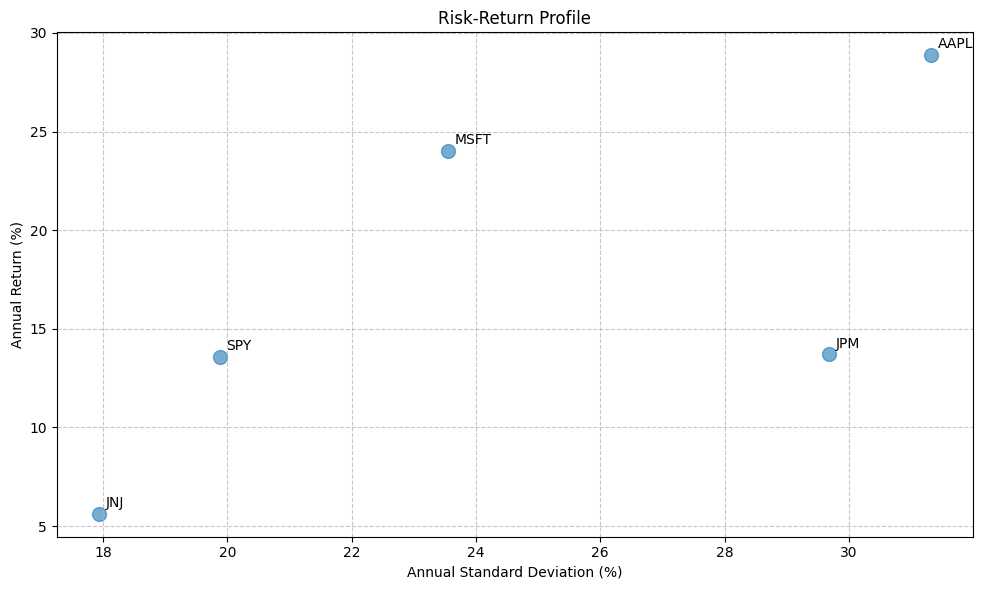

In [4]:
def plot_risk_return(metrics, title="Risk-Return Profile"):
    """
    Creates scatter plot of risk vs return
    """
    plt.figure(figsize=(10, 6))

    # Create scatter plot
    plt.scatter(metrics['Annual Standard Deviation (%)'], metrics['Annual Return (%)'],
                s=100, alpha=0.6)

    # Add labels for each point
    for idx, row in metrics.iterrows():
        plt.annotate(idx,
                     (row['Annual Standard Deviation (%)'],
                      row['Annual Return (%)']),
                     xytext=(5, 5), textcoords='offset points')

    # Add labels and title
    plt.xlabel('Annual Standard Deviation (%)')
    plt.ylabel('Annual Return (%)')
    plt.title(title)

    # Add a grid
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


# Create the plot
plot_risk_return(metrics)


## Analyze Correlations
Understanding correlations between assets is crucial for diversification:


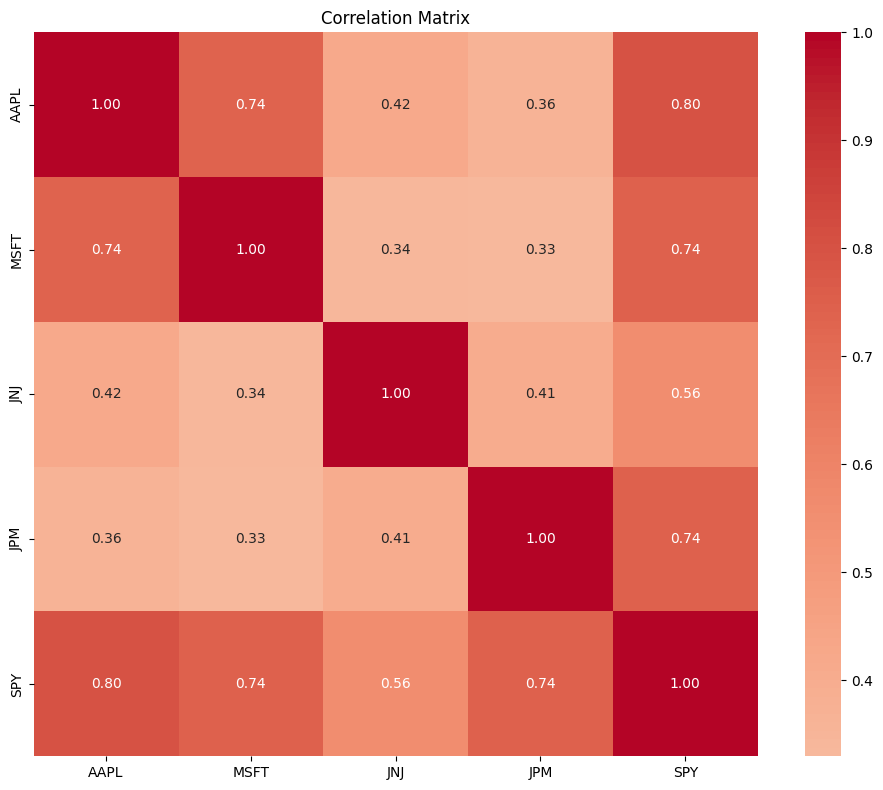

In [5]:
def plot_correlation_matrix(returns_df):
    """
    Creates a correlation matrix heatmap
    """
    corr_matrix = returns_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', square=True)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    return corr_matrix


# Calculate and display correlations
corr_matrix = plot_correlation_matrix(returns_df)

## Exercise for Students
Try modifying this analysis by:
1. Changing the time period (start_date and end_date)
2. Adding different stocks to the analysis
3. Calculating the Sharpe Ratio (assuming a risk-free rate)

## Discussion Questions
1. Which stock has the highest Sharpe Ratio?
2. How does the market index (SPY) compare to individual stocks?
3. What patterns do you notice in the correlation matrix?